In [1]:
import datetime as dt
from pathlib import Path
import seaborn as sns
import os
import requests
import pandas as pd
import yfinance as yf
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Get historical data in YAHOO FINANCE HISTORICAL DATABASE
tsla = yf.Ticker("TSLA")
volks = yf.Ticker("VOW3.DE")
tesla_hist = tsla.history(period="5y")
vow_hist = volks.history(period="5y")
# Create an empty DataFrame for TESLA AND VOLKS.DE closing prices
t_v_closing_prices = pd.DataFrame()
# Fetch the closing prices of TESLA AND VOLKS.DE
t_v_closing_prices["TESLA"] = tesla_hist["Close"]
t_v_closing_prices["VOLKS"] = vow_hist["Close"]
t_v_closing_prices.tail()

,TESLA,VOLKS
Date,,
2020-11-02,400.510010,127.779999
2020-11-03,423.899994,131.740005
2020-11-04,420.980011,132.080002
2020-11-05,438.089996,135.919998
2020-11-06,429.950012,133.160004


In [3]:
load_dotenv()

True

In [4]:
###Set Alpaca API key and secret
alpaca_api_key = os.getenv("api_key_id")
alpaca_secret_key = os.getenv("secret_api_key")
###Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
###Set the tickers
tickers = ["GM", "TM", "F"]
###Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Set start and end datetimes 
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-03", tz="America/New_York").isoformat()

# Get historical data 
f_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Create an empty DataFrame for TICKER closing prices
portfolio_closing_prices = pd.DataFrame()
# Fetch the closing prices of TICKER
portfolio_closing_prices["GM"] = f_ticker["GM"]["close"]
portfolio_closing_prices["TOYOTA"] = f_ticker["TM"]["close"]
portfolio_closing_prices["FORD"] = f_ticker["F"]["close"]

# Drop the time component of the date
portfolio_closing_prices.index = portfolio_closing_prices.index.date
# Display sample data
portfolio_closing_prices.tail(10)

,GM,TOYOTA,FORD
2020-10-21,35.77,133.14,7.8400
2020-10-22,37.42,133.29,8.2200
2020-10-23,36.83,133.33,8.1700
2020-10-26,35.84,132.70,8.0300
2020-10-27,34.89,132.46,7.9200
2020-10-28,34.10,130.07,7.7200
2020-10-29,34.88,131.45,7.9000
2020-10-30,34.53,131.23,7.7246
2020-11-02,34.55,133.28,7.7100
2020-11-03,35.34,135.76,7.8850


In [6]:
#Concatenate STOCKS
all_closing_prices = pd.concat([portfolio_closing_prices,t_v_closing_prices], axis="columns", join="inner")
all_closing_prices.head(10)

,GM,TOYOTA,FORD,TESLA,VOLKS
2015-11-09,35.67,122.2200,14.34,45.066002,84.294083
2015-11-10,35.62,123.5500,14.28,43.299999,83.925301
2015-11-11,35.54,123.2600,14.32,43.816002,84.443352
2015-11-12,35.08,121.7300,14.04,42.588001,83.758453
2015-11-13,34.30,121.3100,13.91,41.438000,84.601402
2015-11-16,35.17,122.0500,14.04,42.862000,85.576050
2015-11-17,35.21,123.1700,14.14,42.799999,86.612160
2015-11-18,36.47,124.9000,14.46,44.214001,89.035622
2015-11-19,36.14,123.9100,14.57,44.360001,92.943001
2015-11-20,36.34,123.6799,14.60,44.001999,95.225975


In [7]:
# Compute daily returns
df_daily_returns = all_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,GM,TOYOTA,FORD,TESLA,VOLKS
2015-11-10,-0.001402,0.010882,-0.004184,-0.039187,-0.004375
2015-11-11,-0.002246,-0.002347,0.002801,0.011917,0.006173
2015-11-12,-0.012943,-0.012413,-0.019553,-0.028026,-0.008111
2015-11-13,-0.022235,-0.003450,-0.009259,-0.027003,0.010064
2015-11-16,0.025364,0.006100,0.009346,0.034365,0.011520
2015-11-17,0.001137,0.009177,0.007123,-0.001447,0.012107
2015-11-18,0.035785,0.014046,0.022631,0.033037,0.027981
2015-11-19,-0.009049,-0.007926,0.007607,0.003302,0.043886
2015-11-20,0.005534,-0.001857,0.002059,-0.008070,0.024563
2015-11-23,-0.007155,-0.004689,-0.002740,-0.010272,0.013370


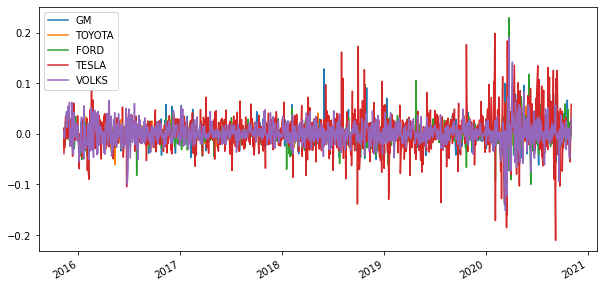

In [8]:
#Plot daily return
df_daily_returns.plot(figsize=(10,5))

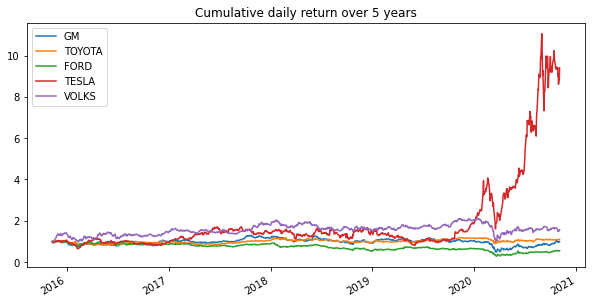

In [9]:
# Calculate the cumulative returns using the 'cumprod()' function
df_cumulative = (1 + df_daily_returns).cumprod()
df_cumulative.plot(figsize=(10,5), title="Cumulative daily return over 5 years")

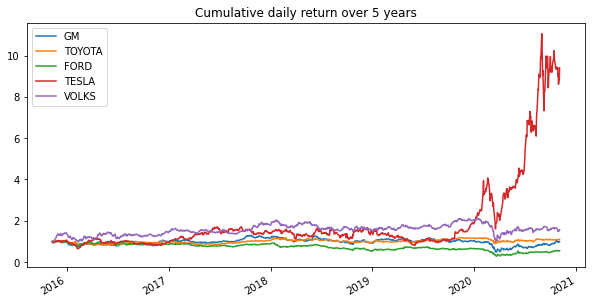

In [10]:
# Save the cumulative returns as .png
df_cumulative.plot(figsize=(10,5), title="Cumulative daily return over 5 years").get_figure().savefig('cum_5y.png')

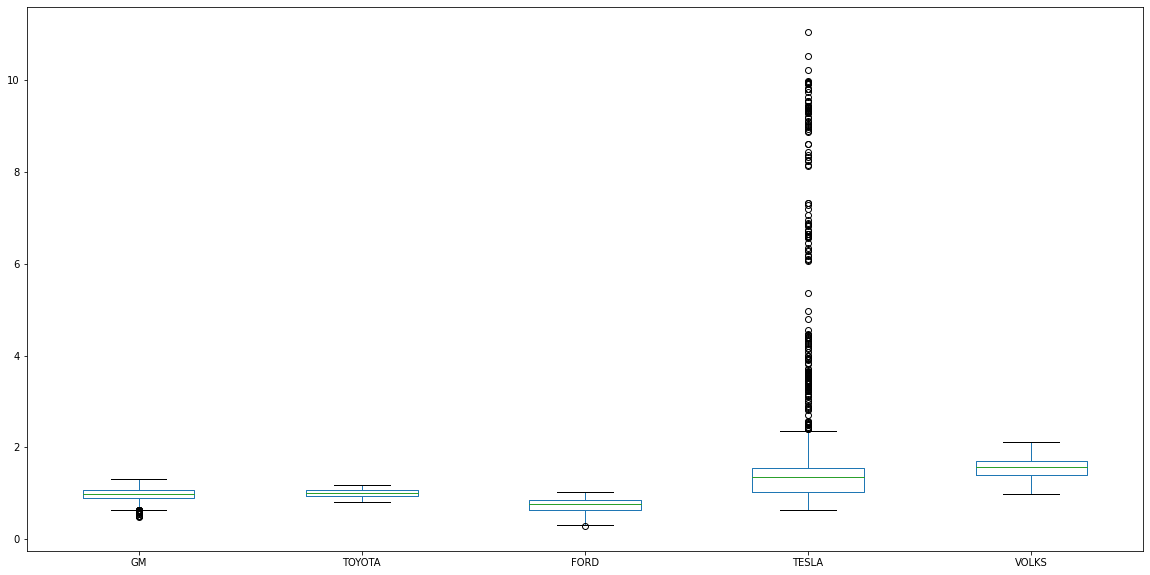

In [11]:
# Plot the cumulative returns using the plot.box
df_cumulative.plot.box(figsize=(20,10))

In [12]:
#check the statistics of dataframe
df_daily_returns.describe()

,GM,TOYOTA,FORD,TESLA,VOLKS
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,0.000241,0.000165,-0.000257,0.002434,0.000601
std,0.022288,0.012779,0.021045,0.036013,0.022150
min,-0.156004,-0.086259,-0.111901,-0.210628,-0.152115
25%,-0.009262,-0.005907,-0.009474,-0.014049,-0.009776
50%,0.000654,0.000182,0.000000,0.001261,0.000000
75%,0.009555,0.006824,0.008879,0.018495,0.010980
max,0.198751,0.095760,0.229927,0.198949,0.190461


In [13]:
# Create an empty DataFrame for closing prices
fiveyears_closing_prices = pd.DataFrame()
# Define your initial investment $
initial_investiment = 10000
# Fetch the closing prices of First and Last day
fiveyears_closing_prices["Nov/2015"] = all_closing_prices.iloc[0]
fiveyears_closing_prices["Nov/2020"] = all_closing_prices.iloc[-1]
fiveyears_closing_prices["% diff"] = round((fiveyears_closing_prices["Nov/2020"] / fiveyears_closing_prices["Nov/2015"]),2)
fiveyears_closing_prices["Current Balance"] = round((initial_investiment * fiveyears_closing_prices["% diff"]),2)
fiveyears_closing_prices

,Nov/2015,Nov/2020,% diff,Current Balance
GM,35.670000,35.340000,0.99,9900.0
TOYOTA,122.220000,135.760000,1.11,11100.0
FORD,14.340000,7.885000,0.55,5500.0
TESLA,45.066002,423.899994,9.41,94100.0
VOLKS,84.294083,131.740005,1.56,15600.0


In [22]:
 # Use the results to calculate the outcome of our initial $10,000 of investment in Apple and Tesla stocks
initial_investiment = 10000
gm_fv = initial_investiment * (fiveyears_closing_prices.iloc[0,2])
tsla_fv = initial_investiment * (fiveyears_closing_prices.iloc[3,2])

# Print results
print(f"If you have invested ${initial_investiment} over 5 years in ${gm_fv} stock your balance would be ${portfolio_fv}"
      f" but if you have invested in tesla instead your balance would be ${tsla_fv}")

If you have invested $10000 over 5 years in $9900.0 stock your balance would be $99000000.0 but if you have invested in tesla instead your balance would be $94100.0


In [15]:
df_daily_returns.describe()

,GM,TOYOTA,FORD,TESLA,VOLKS
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,0.000241,0.000165,-0.000257,0.002434,0.000601
std,0.022288,0.012779,0.021045,0.036013,0.022150
min,-0.156004,-0.086259,-0.111901,-0.210628,-0.152115
25%,-0.009262,-0.005907,-0.009474,-0.014049,-0.009776
50%,0.000654,0.000182,0.000000,0.001261,0.000000
75%,0.009555,0.006824,0.008879,0.018495,0.010980
max,0.198751,0.095760,0.229927,0.198949,0.190461


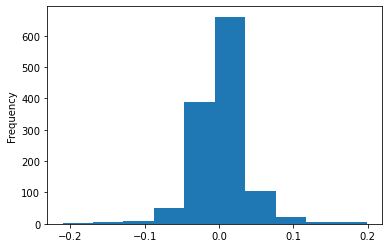

In [16]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot 
df_daily_returns["TESLA"].plot.hist()

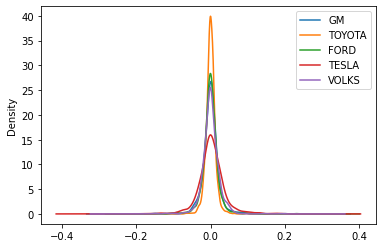

In [17]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot 
txl_closing_prices = all_closing_prices.pct_change().dropna()
txl_closing_prices.plot.density()